In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd 
from torch.utils.data import DataLoader ,Dataset
import numpy as np 
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.optim as optim
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import heapq





In [2]:
T2D_f = pd.read_csv("../Data/Microbiome_data/T2D_data/T2D_fuctional.csv",sep=",")
T2D_tax = pd.read_csv("../Data/Microbiome_data/T2D_data/T2D_taxo.csv",sep=",")
T2D_gen = pd.read_csv("../Data/Microbiome_data/T2D_data/T2D_gen40.csv",sep=",")
T2D_labels = pd.read_csv("../Data/Microbiome_data/T2D_data/T2D_ylab.txt")
T2D_labels= T2D_labels.iloc[:-1]
T2D_labels = T2D_labels[:].values
T2D_labels= pd.DataFrame(T2D_labels)
T2D_labels = T2D_labels.replace({"Control": 1, "T2D": 0})

CRC_f = pd.read_csv("../Data/Microbiome_data/CRC_data/CRC_Fuctional.csv",sep=",")
CRC_tax = pd.read_csv("../Data/Microbiome_data/CRC_data/CRC_Taxo.csv",sep=",")
CRC_gen = pd.read_csv("../Data/Microbiome_data/CRC_data/CRC_gen40.csv",sep=",")
CRC_labels = pd.read_csv("../Data/Microbiome_data/CRC_data/CRC_ylab.txt")
CRC_labels= CRC_labels.iloc[:-1]
CRC_labels = CRC_labels[:].values
CRC_labels= pd.DataFrame(CRC_labels)
CRC_labels = CRC_labels.replace({"control": 1, "CRC": 2})

IBD_f = pd.read_csv("../Data/Microbiome_data/IBD_data/IBD_fuctional.csv",sep=",")
IBD_tax = pd.read_csv("../Data/Microbiome_data/IBD_data/IBD_taxo.csv",sep=",")
IBD_gen = pd.read_csv("../Data/Microbiome_data/IBD_data/IBD_gen40.csv",sep=",")
IBD_labels = pd.read_csv("../Data/Microbiome_data/IBD_data/IBD_ylab.txt")
IBD_labels= IBD_labels.iloc[:-1]
IBD_labels = IBD_labels[:].values
IBD_labels= pd.DataFrame(IBD_labels)
IBD_labels = IBD_labels.replace({"Normal": 1, "IBD": 3})


LC_f = pd.read_csv("../Data/Microbiome_data/LC_data/LC_Fuctional.csv",sep=",")
LC_tax = pd.read_csv("../Data/Microbiome_data/LC_data/LC_taxo.csv",sep=",")
LC_gen = pd.read_csv("../Data/Microbiome_data/LC_data/LC_gen40.csv",sep=",")
LC_labels = pd.read_csv("../Data/Microbiome_data/LC_data/LC_ylab.txt")
LC_labels= LC_labels.iloc[:-1]
LC_labels = LC_labels[:].values
LC_labels= pd.DataFrame(LC_labels)
LC_labels = LC_labels.replace({"Normal": 1, "Cirrhosis": 4})


In [3]:
f1 = torch.tensor(T2D_f.values)
f2 = torch.tensor(T2D_gen.values)
f3 = torch.tensor(T2D_tax.values)
f4 = torch.tensor(IBD_f.values)
f5 = torch.tensor(IBD_gen.values)
f6 = torch.tensor(IBD_tax.values)
f7= torch.tensor(CRC_f.values)
f8 = torch.tensor(CRC_gen.values)
f9= torch.tensor(CRC_tax.values)
f10 = torch.tensor(LC_f.values)
f11= torch.tensor(LC_gen.values)
f12 = torch.tensor(LC_tax.values)

l1 = torch.tensor(T2D_labels.values)
l2 = torch.tensor(IBD_labels.values)
l3 = torch.tensor(CRC_labels.values)
l4 = torch.tensor(LC_labels.values)


In [5]:
T2D_comb = torch.cat((f1,f2,f3), dim=1)
IBD_comb = torch.cat((f4,f5,f6), dim=1)
CRC_comb = torch.cat((f7,f8,f9), dim=1)
LC_comb = torch.cat((f10,f11,f12), dim=1)
compined = torch.cat((T2D_comb,IBD_comb,CRC_comb,LC_comb))

labels_combined = torch.cat((l1,l2,l3,l4))

Test1 = torch.cat((f2,f8,f11))
TestL= torch.cat((l1,l3,l4))

In [6]:
#Save it to tensor .pt objects
torch.save(TestL, '../Data/Tensors_objs/labels.pt')
torch.save(Test1, '../Data/Tensors_objs/features.pt')
np.savetxt("test",Test1,delimiter =",")
np.savetxt("TestL",TestL,delimiter=",")
np.savetxt("Data", compined, delimiter=",")
np.savetxt("Labels", labels_combined, delimiter=",")


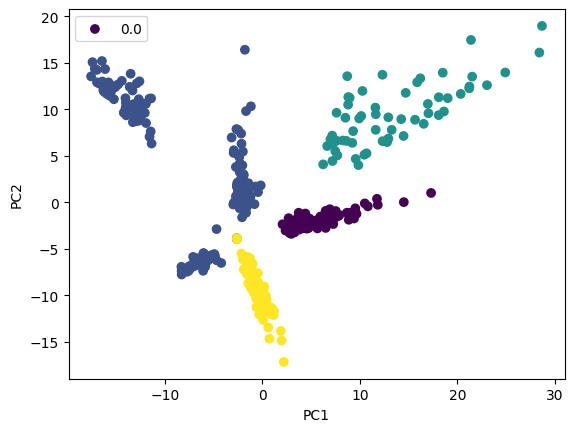

In [7]:


# Load your data into a numpy array called X
X = np.loadtxt("test", delimiter=",")
y = np.loadtxt("TestL")

# Separate your class labels from your feature data


# Apply PCA to reduce the dimensionality of your data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot your data in 2 dimensions, colored by class label
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.legend(y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [8]:
# Load the microbiome data and labels into PyTorch tensors
data = torch.load("../Data/Tensors_objs/features.pt")
labels = torch.load("../Data/Tensors_objs/labels.pt")
data = torch.DoubleTensor(data)
labels = labels.float()
labels = labels.double()
#labels = torch.DoubleTensor(labels)
nan_indices = torch.isnan(data)
data = torch.where(nan_indices, torch.tensor(0.0), data)


dataset = torch.utils.data.TensorDataset(data, labels)
# Define the dataset and dataloader
dataloader = DataLoader(dataset, batch_size=128)

In [9]:
# Define the dataset class
class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = {'data': self.data[idx], 'labels': self.labels[idx]}
        return sample

# Define the encoder
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, latent_size)
        self.fc3 = nn.Linear(hidden_size, latent_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        mu = self.fc2(x)
        logvar = self.fc3(x)
        return mu, logvar

# Define the decoder
class Decoder(nn.Module):
    def __init__(self, latent_size, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_size, hidden_size, latent_size)
        self.decoder = Decoder(latent_size, hidden_size, input_size)
        
    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_hat = self.decoder(z)
        return x_hat, mu, logvar
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

# Define the loss function
def loss_function(x_hat, x, mu, logvar):
    BCE = F.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Set the hyperparameters
batch_size = 128
input_size = 50
hidden_size = 16
latent_size = 2
learning_rate = 1e-4
num_epochs = 100

In [10]:
from sklearn.preprocessing import StandardScaler



#data = torch.log(data + 1)  # apply log transformation to data
dataset = MyDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=batch_size,shuffle=True)


In [17]:
# Define the model, optimizer, and scheduler
model = VAE(input_size, hidden_size, latent_size)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


In [18]:
# Train the model
def train(model, dataloader, optimizer, epoch):
    model.train()
    train_loss = 0
    for batch_idx, batch in enumerate(dataloader):
        x = batch['data'].float()
        optimizer.zero_grad()
        x_hat, mu, logvar = model(x)
        loss = loss_function(x_hat, x, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(x), len(dataloader.dataset),
                100. * batch_idx / len(dataloader),
                loss.item() / len(x)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(
        epoch, train_loss / len(dataloader.dataset)))



In [19]:
# Train the model for several epochs
for epoch in range(5000):
    train(model, dataloader, optimizer, epoch)
    scheduler.step()

Epoch: 0 [0/438 (0%)]	Loss: 30.871202
====> Epoch: 0 Average loss: 30.6475
Epoch: 1 [0/438 (0%)]	Loss: 31.107924
====> Epoch: 1 Average loss: 31.2788
Epoch: 2 [0/438 (0%)]	Loss: 30.219004
====> Epoch: 2 Average loss: 30.4834
Epoch: 3 [0/438 (0%)]	Loss: 29.776003
====> Epoch: 3 Average loss: 30.3396
Epoch: 4 [0/438 (0%)]	Loss: 29.490255
====> Epoch: 4 Average loss: 30.0128
Epoch: 5 [0/438 (0%)]	Loss: 29.271168
====> Epoch: 5 Average loss: 29.8612
Epoch: 6 [0/438 (0%)]	Loss: 30.211918
====> Epoch: 6 Average loss: 29.3179
Epoch: 7 [0/438 (0%)]	Loss: 29.757790
====> Epoch: 7 Average loss: 29.7235
Epoch: 8 [0/438 (0%)]	Loss: 29.441750
====> Epoch: 8 Average loss: 29.6462
Epoch: 9 [0/438 (0%)]	Loss: 29.663877
====> Epoch: 9 Average loss: 29.2962
Epoch: 10 [0/438 (0%)]	Loss: 29.087715
====> Epoch: 10 Average loss: 28.8852
Epoch: 11 [0/438 (0%)]	Loss: 29.041653
====> Epoch: 11 Average loss: 28.9616
Epoch: 12 [0/438 (0%)]	Loss: 27.445137
====> Epoch: 12 Average loss: 28.5631
Epoch: 13 [0/438 (0

In [17]:
torch.save(VAE.state_dict(model), '../Model/VAE_micro.pth')

In [13]:
#load Model and encode data
VAE.load_state_dict(model, torch.load('VAE_micro.pth'))


RuntimeError: Error(s) in loading state_dict for VAE:
	Missing key(s) in state_dict: "encoder.fc3.weight", "encoder.fc3.bias", "decoder.fc2.weight", "decoder.fc2.bias". 
	size mismatch for encoder.fc1.weight: copying a param with shape torch.Size([2, 50]) from checkpoint, the shape in current model is torch.Size([16, 50]).
	size mismatch for encoder.fc1.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for encoder.fc2.weight: copying a param with shape torch.Size([2, 50]) from checkpoint, the shape in current model is torch.Size([2, 16]).
	size mismatch for decoder.fc1.weight: copying a param with shape torch.Size([50, 2]) from checkpoint, the shape in current model is torch.Size([16, 2]).
	size mismatch for decoder.fc1.bias: copying a param with shape torch.Size([50]) from checkpoint, the shape in current model is torch.Size([16]).

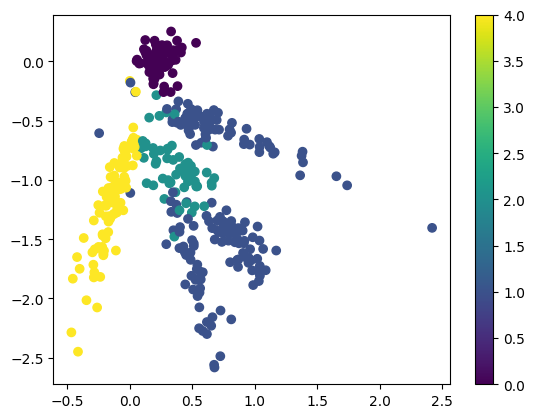

In [20]:
# Encode the data into the latent space
model.eval()
with torch.no_grad():
    encoded_data, labels = [], []
    for batch in dataloader:
        x = batch['data'].float()
        mu, _ = model.encoder(x)
        encoded_data.append(mu)
        labels.append(batch['labels'])
    encoded_data = torch.cat(encoded_data, dim=0)
    labels = torch.cat(labels, dim=0)

# Plot the latent space
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=labels)
plt.colorbar()
plt.show()

In [44]:
with torch.no_grad():
    z, _ = model.encoder(data.float())

/var/folders/wt/pl8gm0gs50d6vpk0nxfh07_h0000gn/T/ipykernel_24568/3579752947.py:57: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, alpha=0.5, linewidths=5)


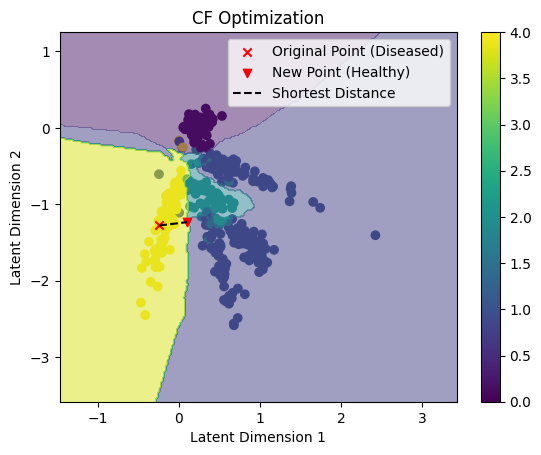

In [50]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

latent_vectors = encoded_data 
mnist_subset_targets = labels 


# Separate the dataset by class
class_0 = torch.where(mnist_subset_targets == 2)[0]

# Create a mask to filter out samples that are not in class 0
mask = (mnist_subset_targets != 0).squeeze()

# Select samples from latent space that are not in class 0
latent_space_not_0 = latent_vectors[mask]
latent_space_not_0 = latent_space_not_0[:,:2]

# Random point from class 0
random_index = torch.randint(high=class_0.shape[0], size=(1,))  # Choose a random index
class_0_random = latent_vectors[random_index]
class_0_random = class_0_random[:,:2].numpy()

# Train a 1-NN classifier on the dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(latent_vectors, mnist_subset_targets.squeeze())

# Define a grid of points in the latent space
x_min, x_max = latent_vectors[:, 0].min() - 1, latent_vectors[:, 0].max() + 1
y_min, y_max = latent_vectors[:, 1].min() - 1, latent_vectors[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250), np.linspace(y_min, y_max, 250))
grid_latent_vectors = np.stack([xx.ravel(), yy.ravel()], axis=1)

# Make predictions with the classifier for the grid of points
Z = knn.predict(grid_latent_vectors).reshape(xx.shape)

# Compute the Euclidean distance between the original point and all points in the grid
distances = np.sqrt((grid_latent_vectors[:, 0] - class_0_random[0, 0])**2 + (grid_latent_vectors[:, 1] - class_0_random[0, 1])**2)

# Find the boundary points that have a different class label than the original point
mask_boundary = knn.predict(grid_latent_vectors) != knn.predict(class_0_random[0, :2].reshape(1, -1))
boundary_distances = np.where(mask_boundary, distances, np.inf)

# Find the point on the boundary with the shortest distance to the original point
min_distance_idx = np.argmin(boundary_distances)
x1, y1 = grid_latent_vectors[min_distance_idx]

# Plot the full latent vectors in 2 dimensions
plt.scatter(latent_vectors[:,0], latent_vectors[:,1], c=mnist_subset_targets)
plt.colorbar()
plt.title('CF Optimization')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')

# Plot the random point from class 0
plt.contourf(xx, yy, Z, alpha=0.5, linewidths=5)
plt.scatter(class_0_random[0,0], class_0_random[0,1], c='r', marker='x', label='Original Point (Diseased)')

# Plot the new point on the decision boundary
plt.scatter(x1, y1, c='r', marker='v', label='New Point (Healthy)')

# Draw a line between the random point and the new point on the decision boundary
plt.plot([class_0_random[0,0], x1], [class_0_random[0,1], y1], c='k',linestyle='--', label='Shortest Distance')

plt.legend()
plt.show()